<a href="https://colab.research.google.com/github/Leandro-Bernardo/Python-developer-certification/blob/main/Banco(POO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### POO 

Modelo OML

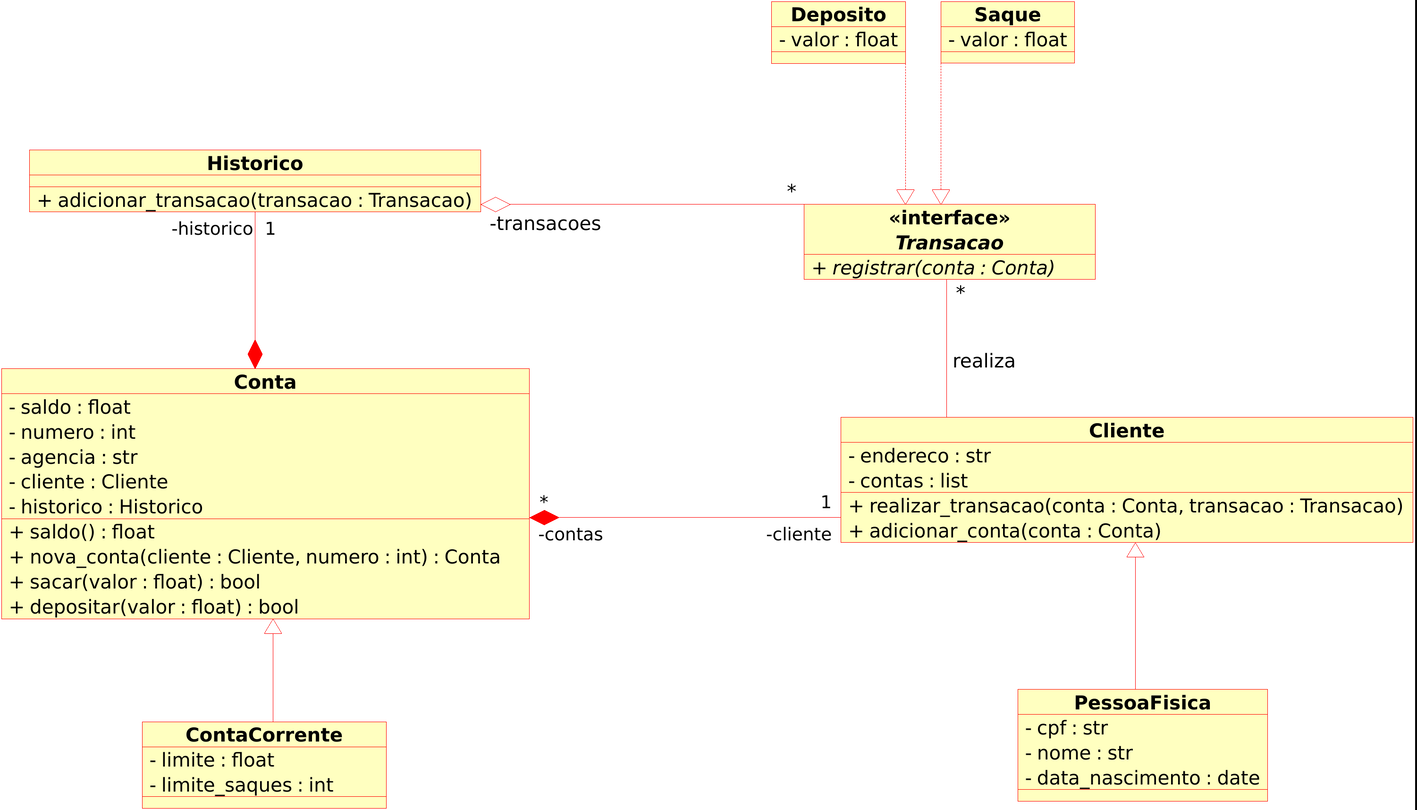

##### Banco criado com orientação ao objeto


In [7]:
import datetime
import abc

In [277]:
class Cliente:   # cria a classe cliente e pega dados do cliente (endereco para criar conta e verifica se ja existem outras contas)

  def __init__(self, endereco ):
    self._endereco = endereco
    self._contas = []       # adiciona as contas do cliente a medida que elas forem sendo criadas


  def __str__ (self):   # dunder __str__ para definir o que será printado (no caso, informacoes da pessoa fisica)
    return f"{self.__class__.__name__}: {','.join([f'{key} = {value}' for key, value in self.__dict__.items()])}"


  def realizar_transacao(self, conta, transacao):
    transacao.registrar(conta)       # cria uma conta 

  def adicionar_conta(self, conta):
    self.contas.append(conta)       # adiciona contas às informações do cliente

In [278]:
class PessoaFisica(Cliente):   # classe para coletar dados iniciais de possiveis clientes
  
  def __init__(self, *, nome, cpf, data_nascimento,endereco):
    super().__init__(endereco)
    self._nome = nome
    self._cpf = cpf
    self._data_nascimento = data_nascimento

  

In [5]:
class Conta():   
  
  def __init__(self, saldo = 0.0, numero = 0, agencia = '0001', cliente = '0', historico = None):   # atributos (privados) da classe com valores Default
    # cria os atributos da classe  ( nesse caso, os atributos são privados pois iniciam com _ )
    self._saldo = saldo
    self._numero = numero
    self._agencia = agencia
    self._cliente = cliente
    self._historico = Historico()


  def __str__ (self):   # dunder __str__ para definir o que será printado
      return f"{self.__class__.__name__}: {','.join([f'{key} = {value}' for key, value in self.__dict__.items()])}"
    # retorna (nome da classe) : (join junta os iteraveis em uma unica string (por um separador de virgula)
    #                                                                         (compreensão de lista para pegar os valores contidos em __dict__ (dunder))
      
    # equivalente à: 
    # return f''' cliente   :  {self._cliente} 
    #             agencia   :  {self._agencia}
    #             numero    :  {self._numero}
    #             saldo     :  {self._saldo}
    #             histórico :  {self._historico}
    #             ''' 

# metodos da classe
  @classmethod
  def nova_conta(cls, cliente, numero):
    return cls(numero,cliente)
 
# metodos da instância
  def sacar(self, valor):
    self.valor = valor  # atributos do metodo


    if self.valor > self._saldo:  # verifica se tem saldo suficiente
      print('Você não tem saldo suficiente!')

    elif self.valor < 0:
      print('Valor inválido ')

    else:    # caso todas as condições sejam válidas
      self._saldo -= self.valor   # executa o saque 
      numero_saques += 1 
      print(f'''saque realizado com sucesso! \nsaldo: {self._saldo}''')     
       
    # global numero_saques
  
    # if self.valor > self._saldo:  # verifica se tem saldo suficiente
    #   print('Você não tem saldo suficiente!')

    # elif self.valor > limite:  # verifica se excedeu o valor maximo de limite (500)
    #   print(f'Valor excede o limite máximo de {limite} reais por saque')

    # elif numero_saques > 3: 
    #   print('Quantidade de saques diários excedida')

    # elif self.valor < 0:
    #   print('Valor inválido ')

    # else:    # caso todas as condições sejam válidas
    #   self._saldo -= self.valor   # executa o saque 
    #   numero_saques += 1 
    #   print(f'''saque realizado com sucesso! \nsaldo: {self._saldo}''')


  def depositar(self,valor):  # deposita um valor na conta 
    if valor > 0:
     self._saldo += valor   # acessa o atributo _saldo e soma com o valor a ser depositado

    else:
      print("\n Operação falhou! O valor informado é inválido.")
      return False
      
    return True
# propriedades
  @property    
  def saldo(self):  # método para mostrar o valor do atributo privado (que pode ser acessado com self._saldo  , mas é contra as boas práticas)
    return self._saldo
  
  @property  
  def numero(self):
    return self._numero

  @property  
  def agencia(self):
    return self._agencia

  @property  
  def cliente(self):
    return self._cliente

  @property  
  def historico(self):
    return self._historico  

In [6]:
class ContaCorrente(Conta):    # tipo de conta do usuario (atualmente, apenas conta corrente disponível; aberto à criação de novas contas (que deverão ser herdadas))
                                # Classe ContaCorrente herda os atributos da classe Conta (aberto à criação de novas contas; que deverão ser herdadas)
 # atributos da classe
  numero_saques = 0   
  qtd_maxima_saques = 3   
  limite = 500        

  # atributos da instancia 
  def __init__(self,  numero,  cliente ):
    super().__init__(self, numero, cliente) # faz a implementação dos atributos de __init__ da classe Mãe (Conta)

  # def __init__(self, saldo , numero, agencia , cliente , historico ):
  #   super().__init__(self, saldo , numero, agencia , cliente , historico) # faz a implementação dos atributos de __init__ da classe Mãe (Conta)

  def __str__ (self):   # __str__ para definir o que será printado
      return f"{self.__class__.__name__}: {','.join([f'{key} = {value}' for key, value in self.__dict__.items()])}"

  def sacar(self,valor):
    # cria uma lista contendo quandidade de saques guardados em  'tipo' (de transacao) contido em self.historico.transacoes     
    numero_saques = len([t for t in self.historico.transacoes if t['tipo'] == saque.__name__])  

    # determina as possibilidades para sacar com o tipo de conta  sendo Conta Corrente
    if self.valor > limite:  # verifica se excedeu o valor maximo de limite (500)
      print(f'Valor excede o limite máximo de {limite} reais por saque')

    elif numero_saques > 3: 
      print('Quantidade de saques diários excedida')

    else:    # caso todas as condições sejam válidas
      return super().sacar(valor)

    return False

In [1]:
class Historico():
  def __init__(self):
    self._transacoes = []  # cria uma lista vazia para armazenar as transações

    @property
    def transacoes(self):
      return self._transacoes

    def add_transacao(self,transacao):
      self._transacoes.append(
          {
              'tipo'  : transacao.__class__.__name__,
              'valor' : transacao.valor,
              'data'  : datetime.now().strftime('%d-%m-%Y %H:%M:%s') # utiliza o modulo datetime para armazenar o horario da transacao (datetime.now() 
                                                                     #  no formato dia-mes-ano  hora:minuto:segundo)
          }
      )

In [11]:
class Transacao(abc.ABC):

  @property
  @abc.abstractproperty
  def valor(self):
    pass
  
  @abc.abstractclassmethod
  def registrar(self, conta):
    pass


In [ ]:
class Saque(Transacao):

  def __init__(self,valor):
    self._valor = valor

  @property
  def valor(self):
    return self._valor

  def registrar(self, conta):
    sucesso_transacao = conta.sacar(self.valor)

    if sucesso_transacao:
        conta.historico.add_transacao(self)  # executa o metodo add_transacao pertecente à conta.historico (conta é informada nesse metodo como parametro)

In [ ]:
class deposito(Transacao):

  def __init__ (self, valor):
    self._valor = valor

  @property
  def valor(self):
    return self._valor

  def registrar(self, conta):
    sucesso_transacao = conta.depositar(self,valor)

    if sucesso_transacao:
      conta.historico.add_transacao(self)


##### Menu 

In [ ]:
def menu():
  menu = """
Depositar :   Comando [d]
Sacar     :   Comando [s]
Extrato   :   Comando [e]
Sair      :   Comando [q] 
"""